<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_IngenieriaDeDatos/blob/main/Ayudantia3_Tarea3y4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantia 3: Ejemplos para Tarea 3 y 4

# SETUP

In [ ]:
%load_ext sql
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Ejercicios

## Conectarse a BD y cargar csv

Crearemos una base de datos vacia y cargaremos un csv como dataframe (para ustedes los archivos .db son dados, no deben crear nuevos, solo conectarse a las bases de datos)

In [ ]:
# Conexion y cursor
conn = sqlite3.connect("datos.db") # Si no existe, crea un .db vacio
curr = conn.cursor()
# Con el archivo .db, ahora se puede usar SQL
%sql sqlite:///datos.db

In [ ]:
# Cargar csv como dataframe

housing_df = pd.read_csv("sample_data/california_housing_test.csv")
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## Operaciones tipo sql sobre un dataframe

Equivalente a SELECT de `total_rooms` y `total_bedrooms`

In [ ]:
select_df = housing_df[["total_rooms", "total_bedrooms"]]
select_df.head(5)

,total_rooms,total_bedrooms
0,3885.0,661.0
1,1510.0,310.0
2,3589.0,507.0
3,67.0,15.0
4,1241.0,244.0


Equivalentes a un WHERE, en este caso, `WHERE total_bedrooms <= 100`

In [ ]:
where_df_1 = housing_df[ housing_df['total_bedrooms'] <= 100 ]
where_df_1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
15,-117.99,33.81,42.0,161.0,40.0,157.0,50.0,2.2000,153100.0
115,-118.85,34.17,42.0,564.0,96.0,220.0,81.0,4.5625,318800.0
119,-118.41,34.00,38.0,324.0,70.0,268.0,73.0,2.5500,271400.0
220,-122.18,37.78,33.0,142.0,31.0,575.0,47.0,3.8750,225000.0


WHERE con AND, como el anterior, pero se usa el and de pandas `&` y se encierran en parentesis las multiples condiciones.

Esto es un `WHERE total_bedrooms <= 100 AND population > 50`

In [ ]:
where_df_2 = housing_df[ (housing_df['total_bedrooms'] <= 100) & (housing_df['population'] > 50) ]
where_df_2.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15,-117.99,33.81,42.0,161.0,40.0,157.0,50.0,2.2000,153100.0
115,-118.85,34.17,42.0,564.0,96.0,220.0,81.0,4.5625,318800.0
119,-118.41,34.00,38.0,324.0,70.0,268.0,73.0,2.5500,271400.0
220,-122.18,37.78,33.0,142.0,31.0,575.0,47.0,3.8750,225000.0
224,-121.44,38.61,34.0,172.0,38.0,149.0,55.0,2.6442,55000.0


WHERE con OR, igual al anterior, pero se usa el or de pandas `|`.

Esto es un `WHERE total_bedrooms <= 100 OR population > 50`

In [ ]:
where_df_3 = housing_df[ (housing_df['total_bedrooms'] <= 100) | (housing_df['population'] > 50) ]
where_df_3.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Para los ejemplos de JOIN y GROUP BY el dataframe de arriba no es el mejor, me dare la libertad de inventar. La siguiente celda es una forma de crear dataframes (no necesitan saberla)

In [ ]:
# Preparacion para el ejemplo, no necesitan saber esto
usuarios = {
    "id": [1, 2, 3, 4],
    "Nombre": ["Dafne", "Pablo", "Kaina", "Maria Jose"]
}

cursos_asignados = {
    "idUsuario": [1, 1, 1, 2, 3, 3, 4],
    "nombreCurso": ["Bases de datos", "Programacion en Python", "Diseño web", "Bases de datos", "Bases de datos", "Programacion en Python", "Bases de datos"]
}

usuarios_df = pd.DataFrame.from_dict(usuarios)
asignados_df = pd.DataFrame.from_dict(cursos_asignados)


Dataframes

In [ ]:
usuarios_df

,id,Nombre
0,1,Dafne
1,2,Pablo
2,3,Kaina
3,4,Maria Jose


In [ ]:
asignados_df

,idUsuario,nombreCurso
0,1,Bases de datos
1,1,Programacion en Python
2,1,Diseño web
3,2,Bases de datos
4,3,Bases de datos
5,3,Programacion en Python
6,4,Bases de datos


JOIN

In [ ]:
ejemploJoin = pd.merge(usuarios_df, asignados_df, left_on="id", right_on="idUsuario")
ejemploJoin

,id,Nombre,idUsuario,nombreCurso
0,1,Dafne,1,Bases de datos
1,1,Dafne,1,Programacion en Python
2,1,Dafne,1,Diseño web
3,2,Pablo,2,Bases de datos
4,3,Kaina,3,Bases de datos
5,3,Kaina,3,Programacion en Python
6,4,Maria Jose,4,Bases de datos


GROUP BY sobre el join anterior para contar cursos asignados a cada ayudante (se agrupa por id, se selecciona el nombre)

In [ ]:
cantidadCursos = ejemploJoin["id"].groupby(ejemploJoin["Nombre"]).size()
cantidadCursos

Nombre
Dafne         3
Kaina         2
Maria Jose    1
Pablo         1
Name: id, dtype: int64

Dato: esta operación no resulta en un dataframe, sino en una serie

In [ ]:
print(type(cantidadCursos))

<class 'pandas.core.series.Series'>


Para transformalo a un dataframe

In [ ]:
tranf = pd.DataFrame(cantidadCursos.reset_index())
tranf

,Nombre,id
0,Dafne,3
1,Kaina,2
2,Maria Jose,1
3,Pablo,1


In [ ]:
print(type(tranf))

<class 'pandas.core.frame.DataFrame'>


## Grafico de datos

Grafico de barras

<BarContainer object of 4 artists>

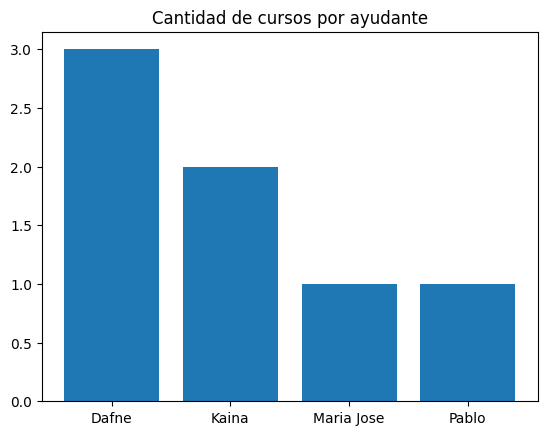

In [ ]:
fig = plt.figure()
plt.title("Cantidad de cursos por ayudante")
plt.bar(cantidadCursos.keys(), cantidadCursos)

Grafico scatter (desde aqui, volvere al dataframe que teniamos antes)

¿Hay alguna relación entre la cantidad de habitaciones y la población?

<Axes: xlabel='total_rooms', ylabel='population'>

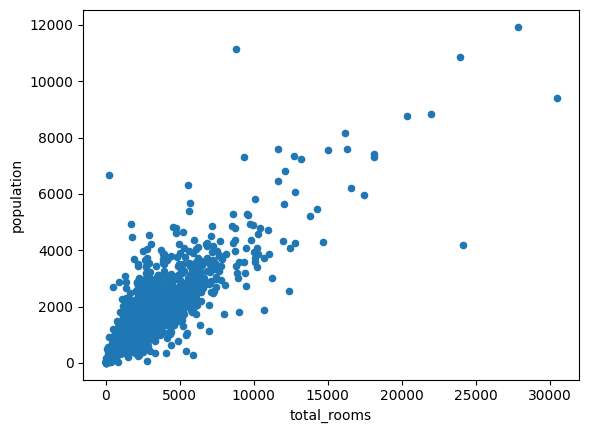

In [ ]:
housing_df.plot.scatter(x="total_rooms", y="population")

## Apoyo para tarea final

Las siguientes son operaciones de ejemplo que pueden ayudarlos, algunas con la tarea 3, la mayoria para la tarea 4. Vamos a insertar datos desde un dataframe a la base de datos.

Borrare algunas columnas, digamos que solo nos interesan `longitude`, `latitude` y `housing_median_age`

In [ ]:
housing_df_2 = housing_df.drop(columns=["total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"])
housing_df_2.head(5)

,longitude,latitude,housing_median_age
0,-122.05,37.37,27.0
1,-118.30,34.26,43.0
2,-117.81,33.78,27.0
3,-118.36,33.82,28.0
4,-119.67,36.33,19.0


Vamos a crear una tabla simple, a continuacion le añadiremos datos

In [ ]:
%%sql
DROP TABLE IF EXISTS housing;
CREATE TABLE housing(lon FLOAT, lat FLOAT, housing_median_age FLOAT);

 * sqlite:///datos.db
Done.
Done.


[]

No olvidar, para insertar datos desdse un dataframe a al BD los nombres de las columnas deben coincidir. Se cambia "longitude" por "lon" y "latitude" por "lat"

In [ ]:
housing_df_2 = housing_df_2.rename(columns={"longitude": "lon", "latitude": "lat"})
housing_df_2.head(5)

,lon,lat,housing_median_age
0,-122.05,37.37,27.0
1,-118.30,34.26,43.0
2,-117.81,33.78,27.0
3,-118.36,33.82,28.0
4,-119.67,36.33,19.0


In [ ]:
housing_df_2.to_sql(name="housing", con=conn, if_exists="append", index=False)

3000

Que son los argumentos?
* `name`: nombre de la tabla a la cual vamos a insertar los datos
* `con`: conexion a la base de datos (lo hicimos al principio)
* `if_exists="append"`: append indica que estamos añadiendo datos
* `index=False`: indica que no queremos añadir los indices de pandas a la tabla

Podemos comprobar que se cargaron datos bien

In [ ]:
%%sql
SELECT *
FROM housing
WHERE housing_median_age < 30
LIMIT 5;

 * sqlite:///datos.db
Done.


lon,lat,housing_median_age
-122.05,37.37,27.0
-117.81,33.78,27.0
-118.36,33.82,28.0
-119.67,36.33,19.0
-120.65,35.48,19.0


Comandos sql con sqlite, nos permiten obtener una lista de datos

In [ ]:
curr.execute("SELECT * FROM housing WHERE lat = 37.37") # Consulta
info = curr.fetchall() # Obtener resultado
info

[(-122.05, 37.37, 27.0),
 (-121.88, 37.37, 14.0),
 (-122.13, 37.37, 30.0),
 (-121.81, 37.37, 26.0),
 (-122.12, 37.37, 37.0),
 (-122.11, 37.37, 49.0),
 (-121.98, 37.37, 35.0),
 (-121.95, 37.37, 39.0),
 (-120.5, 37.37, 18.0),
 (-121.83, 37.37, 43.0)]

Podemos obtener una lista de datos de una consulta, e insertar eso en otra base de datos (solo para el ejemplo, insertaremos los mismos que consultamos a la base de datos)

In [ ]:
for dato in info:
  curr.execute(
      "INSERT INTO housing (lon, lat, housing_median_age) values (?, ?, ?)",
      (dato[0], dato[1], dato[2])
  )
conn.commit() # Esto cambia la BD, se debe confirmar

`commit()` debe usarse despues de hacer acciones que modifican la base de datos, como añadir información, cambiar columnas, eliminar tablas, etc.

Notar que hacer consultas solo nos muestra información, por lo que no es necesesario en ese caso

Resultado de insertar, ahora la consulta de antes arroja más valores

In [ ]:
curr.execute("SELECT * FROM housing WHERE lat = 37.37")
info = curr.fetchall()
info

[(-122.05, 37.37, 27.0),
 (-121.88, 37.37, 14.0),
 (-122.13, 37.37, 30.0),
 (-121.81, 37.37, 26.0),
 (-122.12, 37.37, 37.0),
 (-122.11, 37.37, 49.0),
 (-121.98, 37.37, 35.0),
 (-121.95, 37.37, 39.0),
 (-120.5, 37.37, 18.0),
 (-121.83, 37.37, 43.0),
 (-122.05, 37.37, 27.0),
 (-121.88, 37.37, 14.0),
 (-122.13, 37.37, 30.0),
 (-121.81, 37.37, 26.0),
 (-122.12, 37.37, 37.0),
 (-122.11, 37.37, 49.0),
 (-121.98, 37.37, 35.0),
 (-121.95, 37.37, 39.0),
 (-120.5, 37.37, 18.0),
 (-121.83, 37.37, 43.0)]

En caso de necesitar un dataframe con datos de la DB (en vez de una lista de datos)

In [ ]:
test_df = pd.read_sql_query("SELECT * FROM housing WHERE housing_median_age < 10", conn)
test_df.head(5)

,lon,lat,housing_median_age
0,-118.08,34.55,5.0
1,-117.24,33.17,4.0
2,-121.35,38.00,6.0
3,-117.50,33.87,4.0
4,-119.18,34.27,6.0


Nos enojamos con la tabla, la eliminaremos

In [ ]:
curr.execute("DROP TABLE housing")
conn.commit() # Eliminar una tabla cambia la BD, se confirma

In [ ]:
%%sql
SELECT *
FROM housing
LIMIT 5;

 * sqlite:///datos.db
(sqlite3.OperationalError) no such table: housing
[SQL: SELECT *
FROM housing
LIMIT 5;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
